In [1]:
import numpy as np
from sight_line_constructor import Sightline
import read_cubes
from scipy import ndimage


In [2]:
path = "/var/lib/libvirt/images/nbody/baorsd/run101/density_field/S020_CIC1024_conf.bin"

cube = read_cubes.read(path)

In [3]:
res = 2
start_point = np.array([0,90,100]) #Mpc/h
end_point = np.array([300,90,100]) #Mpc/h


In [4]:
s1 = Sightline(start_point,end_point)

In [5]:
s1.r

300.0

In [7]:
los_dens = s1.calc_los( 2,cube)

In [8]:
los_dens.shape

(1000,)

In [9]:
import matplotlib.pyplot as plt

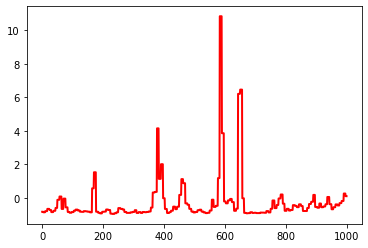

In [10]:
plt.plot(los_dens,color="red",lw=2)

In [11]:
los_dens.sum()/1000

-0.2937166748046875